In [19]:
import torch

torch.manual_seed(0)

# 用pytorch内置函数实现softmax回归

In [20]:
import pandas as pd

table = pd.read_csv("Iris.csv")
table.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
# 数据生成器，用于读取批量数据
def data_iter(batch_size):
    # 变更类别
    cate_list = table["Species"].unique().tolist()
    table["Species"] = table["Species"].apply(cate_list.index)
    # 赋值给 tensor
    data = torch.from_numpy(table.iloc[:, 1:].to_numpy()).float()
    # 数据大小
    data_num = len(data)
    # 随机排列
    permutation = torch.randperm(data_num)
    # 每次取 batch_size 个
    for i in range(0, data_num, batch_size):
        # 每个 batch 的下标
        indices = permutation[i:i+batch_size]
        yield data[indices]
    
data_iter_ = data_iter(5)
for _ in range(4):
    data = next(data_iter_)
    print(data)

tensor([[5.1000, 3.8000, 1.9000, 0.4000, 0.0000],
        [6.5000, 2.8000, 4.6000, 1.5000, 1.0000],
        [5.7000, 3.0000, 4.2000, 1.2000, 1.0000],
        [6.6000, 3.0000, 4.4000, 1.4000, 1.0000],
        [5.0000, 3.2000, 1.2000, 0.2000, 0.0000]])
tensor([[5.6000, 2.5000, 3.9000, 1.1000, 1.0000],
        [5.6000, 2.8000, 4.9000, 2.0000, 2.0000],
        [5.4000, 3.0000, 4.5000, 1.5000, 1.0000],
        [5.0000, 3.3000, 1.4000, 0.2000, 0.0000],
        [6.7000, 2.5000, 5.8000, 1.8000, 2.0000]])
tensor([[7.9000, 3.8000, 6.4000, 2.0000, 2.0000],
        [6.7000, 3.3000, 5.7000, 2.1000, 2.0000],
        [6.0000, 2.9000, 4.5000, 1.5000, 1.0000],
        [6.1000, 2.8000, 4.7000, 1.2000, 1.0000],
        [4.8000, 3.4000, 1.6000, 0.2000, 0.0000]])
tensor([[5.0000, 3.4000, 1.6000, 0.4000, 0.0000],
        [7.4000, 2.8000, 6.1000, 1.9000, 2.0000],
        [4.6000, 3.2000, 1.4000, 0.2000, 0.0000],
        [6.5000, 3.0000, 5.5000, 1.8000, 2.0000],
        [4.7000, 3.2000, 1.6000, 0.2000, 0.0000

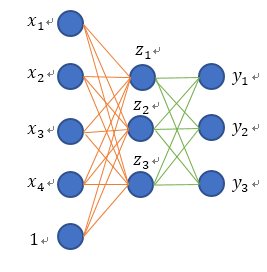

In [22]:
import torch.optim as optim
import torch.nn.functional as F

# 参数初始化
W_1 = torch.randn(3, 5, requires_grad=True)
W_2 = torch.randn(3, 3, requires_grad=True)

# 训练阶段
epoch_num  = 20000
batch_size = 8
learning_rate = 1e-3

# 生成优化器
optimizer = optim.SGD([W_1, W_2], lr=learning_rate)

for epoch in range(epoch_num):
    for data in data_iter(batch_size):
        # forward
        X = torch.cat((data[:, :-1], torch.ones(data.size()[0], 1)), 1)
        X = X.unsqueeze(2)
        Z = W_1.matmul(X)
        Y = W_2.matmul(Z)
        Y = Y.squeeze(2)
        Loss = F.cross_entropy(Y, data[:, -1].long())
        
        # update
        optimizer.zero_grad()
        Loss.backward()
        optimizer.step()

    if epoch % 5000 == 0:
        print(" for epoch %d\t\t, Loss is %s" % (epoch, Loss.item()))
        print(" W_1: %s" % (W_1))
        print(" W_2: %s" % (W_2))


 for epoch 0		, Loss is 4.782564640045166
 W_1: tensor([[ 1.1979, -0.5969,  0.1304,  0.5001,  0.6529],
        [-0.6836,  0.2893,  1.2486,  1.1348,  0.3838],
        [-0.0609, -0.9244, -1.1184,  0.4075,  0.3884]], requires_grad=True)
 W_2: tensor([[ 1.5594,  0.1994,  0.5242],
        [-0.4528,  0.3303,  0.7661],
        [ 1.4765,  0.8151,  1.5559]], requires_grad=True)
 for epoch 5000		, Loss is 0.0012300316011533141
 W_1: tensor([[ 0.2108, -0.6092, -0.2826,  0.6838,  0.0131],
        [-1.4535, -0.8793,  2.7610,  2.1711, -0.7092],
        [-0.5952, -1.2369, -0.6754,  0.8661, -0.2050]], requires_grad=True)
 W_2: tensor([[ 1.1609e+00, -1.7753e+00,  6.5427e-01],
        [ 4.6162e-02,  2.7937e-03,  3.3041e-01],
        [ 1.3759e+00,  3.1172e+00,  1.8614e+00]], requires_grad=True)
 for epoch 10000		, Loss is 0.0013536904007196426
 W_1: tensor([[ 0.2204, -0.5824, -0.3315,  0.7056, -0.2573],
        [-1.3973, -0.9261,  2.8365,  2.3168, -1.3660],
        [-0.5632, -1.2226, -0.6813,  0.9153, -0

In [23]:
# 测试
total_num   = 0
correct_num = 0

with torch.no_grad():
    for data in data_iter(1):
        total_num += 1
        
        # forward
        X = torch.cat((data[:, :-1], torch.ones(data.size()[0], 1)), 1)
        X = X.unsqueeze(2)
        Z = W_1.matmul(X)
        Y = W_2.matmul(Z)
        Y = Y.squeeze(2)
        
        if Y.argmax() == data[0, -1]:
            correct_num += 1

    print("correct: %d / %d" % (correct_num, total_num))

correct: 147 / 150
